In [1]:
# load libraries
library(dplyr)
library("edgeR")
library(Matrix)
library(gplots)
library(RColorBrewer)
library(irlba)
library(proxy)
library(png)
library(tidyverse)
library(ComplexHeatmap)
library(here)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: limma


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.1”

Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Warning message:
“package ‘ggplot2’ was built under R version 4.2.1”
Warning message:
“package ‘tibble’ was built under R version 4.2.1”
── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2.9000 ──
✔ forcats   1.0.0.9000     ✔ readr     2.1.4     
✔ ggplot2

In [10]:
working_location <- "/scratch/jpm73279/comparative_single_cell/09.ortholog_heatmap/00.data"

#single_copy_ortho_group_files <- "Orthogroups_SingleCopyOrthologues.txt"
all_zm_vs_sb_orthologue_file <- "Sbicolor.prot__v__Zm-B73.prot.tsv"

zm_meta_file <- "Zm.leaf_annot.V5.meta.frozen.txt"
sb_meta_file <- "Sb.leaf_annot.V5.meta.frozen.txt"


sb_integration_event_file <- "Sb.gene_accessabity.subsampled.txt"
zm_integration_event_file <- "Zm.gene_accessabity.subsampled.txt"


In [24]:
all_zm_vs_sb_orthologue

Orthogroup,sb_gene,zm_gene,Sb_count,Zm_count
<chr>,<chr>,<chr>,<int>,<int>
OG0000001,Sobic.008G140050,Zm00001eb279530,0,0
OG0000004,Sobic.002G121450,Zm00001eb050830,0,0
OG0000006,Sobic.002G285200,Zm00001eb104090,0,0
OG0000006,Sorbiv5.1_pg26769.valid,Zm00001eb321140,0,0
OG0000007,Sobic.010G127300,Zm00001eb381250,0,0
OG0000007,Sorbiv5.1_pg27169.valid,Zm00001eb305320,0,0
OG0000007,Sorbiv5.1_pg17558.valid,Zm00001eb416480,0,0
OG0000007,Sobic.001G075000,Zm00001eb058940,0,0
OG0000007,Sorbiv5.1_pg35872,Zm00001eb116780,0,0


In [36]:

#single_copy_ortho_group_list <- read_delim(here(working_location, single_copy_ortho_group_files), 
#                                           col_names = c("ortho_groups"),
#                                           delim = '\t')



Sb_vs_Zm_orthos <- read_delim(here(working_location, all_zm_vs_sb_orthologue_file), 
                                           col_names = TRUE,
                                           delim = '\t') 

colnames(Sb_vs_Zm_orthos) <- sub("-", "_", colnames(Sb_vs_Zm_orthos), fixed = TRUE)

zm_base <- "Zm"
sb_base <- "Sobic"
all_zm_vs_sb_orthologue <- Sb_vs_Zm_orthos %>%
                            rowwise() %>% 
                            mutate(Sb_count = str_count(Sbicolor.prot, pattern = ","))  %>% 
                            mutate(Zm_count = str_count(Zm_B73.prot, pattern = ",")) %>%
                            dplyr::filter(Sb_count == 0 & Zm_count == 0) %>% 

                            #filter(ortho_groups %in% single_copy_ortho_group_list$ortho_groups)  %>% 
                            #select(ortho_groups, X2, X3) %>%                            
                            rename("sb_gene" = Sbicolor.prot)  %>% 
                            rename("zm_gene" = Zm_B73.prot)  %>% 
                            mutate(zm_gene = str_replace(zm_gene, "_P00.*", "")) %>%
                            mutate(sb_gene = str_replace(sb_gene, "\\.[^\\.]*$", ""))  %>% 
                            group_by(Orthogroup)  %>% 
                            mutate(COUNTER = 1:n())  %>% 
                            rowwise()  %>% 
                            mutate(Orthogroup = str_c(Orthogroup, COUNTER, sep = "_"))
    
                        

Rows: 20081 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Orthogroup, Sbicolor.prot, Zm-B73.prot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
sb_meta_data <- readr::read_delim(here(working_location, sb_meta_file), col_names = TRUE)

Rows: 15301 Columns: 39
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (19): cellID, sampleID, d.type, LouvainCluster_t, louvain_clusters_sub, ...
dbl (20): total, tss, acrs, ptmt, nSites, log10nSites, pTSS, FRiP, pOrg, tss...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
sb_raw_cpm_counts_all_genes <- readr::read_delim(here(working_location, sb_integration_event_file), delim="\t", col_names = c("gene_name", "barcode", "accessability")) 


Rows: 24290361 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): gene_name, barcode
dbl (1): accessability

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
sb_raw_cpm_counts_all_genes <- sb_raw_cpm_counts_all_genes %>%
    dplyr::mutate(cellID = barcode)  %>%
    dplyr::mutate(sb_gene = gene_name)

In [39]:
sb_merged_meta_cpm_information <- left_join(sb_meta_data, sb_raw_cpm_counts_all_genes, by = c("cellID"))  %>%
    #mutate(safe_cluster_name = str_c("Louvain_C", LouvainClusters, sep ="_"))  %>%
    #dplyr::select(-LouvainClusters)  %>%
    group_by(final_annotation, sb_gene)  %>%
    summarise(counts = sum(accessability, na.rm = TRUE))

`summarise()` has grouped output by 'final_annotation'. You can override using the `.groups` argument.


In [40]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}

In [41]:
### Read in Sb Data - Calculate CPM Values
sb_merged_meta_cpm_information_copied <- sb_merged_meta_cpm_information
sb_cpm_calculations <- sb_merged_meta_cpm_information_copied  %>%
    group_by(final_annotation) %>%
    group_map(~(cpm(.x$counts, log = FALSE, group = .f)), .keep = TRUE)  %>%
    unlist()

sb_cpm_calculations_values <- as_tibble(sb_cpm_calculations)
sb_cpm_calculations_values <- ungroup(sb_cpm_calculations_values)
sb_merged_meta_cpm_information_copied<- bind_cols(sb_merged_meta_cpm_information_copied,sb_cpm_calculations_values)  %>% 
    rename(grouped_CPM = value)


sb_wider_plotting <- sb_merged_meta_cpm_information_copied %>% 
    dplyr::select(-counts) %>% 
    pivot_wider(names_from = sb_gene, values_from = grouped_CPM, values_fill = 0) %>% 
    pivot_longer(cols = -final_annotation, names_to = "sb_gene", values_to = "grouped_CPM") %>% 
    group_by(sb_gene) %>% 
    mutate(Zscore = scale(grouped_CPM)) %>% 
    mutate(relative_accessability = range01(Zscore))  %>% 
    ungroup()  %>% 
    #mutate(relative_accessability = rescale(Zscore, to = c(0,1))) %>% 
    group_by(final_annotation)  %>% 
    mutate(Zscore_group = scale(grouped_CPM)) %>% 
    filter(sb_gene %in% all_zm_vs_sb_orthologue$sb_gene)  %>% 
    left_join(., all_zm_vs_sb_orthologue, by = c("sb_gene")) 

In [42]:
## Read in Zm Data and calculate CPM 
zm_meta_data <- readr::read_delim(here(working_location, zm_meta_file), col_names = TRUE) 

zm_raw_cpm_counts_all_genes <- readr::read_delim(here(working_location,zm_integration_event_file), delim="\t", col_names = c("gene_name", "barcode", "accessability")) %>%
    dplyr::mutate(cellID = barcode)  %>%
    dplyr::mutate(zm_gene = gene_name)


zm_merged_meta_cpm_information <- left_join(zm_meta_data, zm_raw_cpm_counts_all_genes, by = c("cellID"))  %>%
    #mutate(safe_cluster_name = str_c("Louvain_C", LouvainClusters, sep ="_"))  %>%
    #dplyr::select(-LouvainClusters)  %>%
    group_by(final_annotation, zm_gene)  %>%
    summarise(counts = sum(accessability, na.rm = TRUE))


### Read in Zm Data - Calculate CPM Values
zm_merged_meta_cpm_information_copied <- zm_merged_meta_cpm_information
zm_cpm_calculations <- zm_merged_meta_cpm_information_copied  %>%
    group_by(final_annotation) %>%
    group_map(~(cpm(.x$counts, log = FALSE, group = .f)), .keep = TRUE)  %>%
    unlist()
zm_cpm_calculations_values <- as_tibble(zm_cpm_calculations)


zm_cpm_calculations_values <- ungroup(zm_cpm_calculations_values)
zm_merged_meta_cpm_information_copied<- bind_cols(zm_merged_meta_cpm_information_copied,zm_cpm_calculations_values)  %>% 
    rename(grouped_CPM = value)


zm_wider_plotting <- zm_merged_meta_cpm_information_copied %>% 
    dplyr::select(-counts) %>% 
    pivot_wider(names_from = zm_gene, values_from = grouped_CPM, values_fill = 0) %>% 
    pivot_longer(cols = -final_annotation, names_to = "zm_gene", values_to = "grouped_CPM") %>% 
    group_by(zm_gene) %>% 
    mutate(Zscore = scale(grouped_CPM)) %>% 
    mutate(relative_accessability = range01(Zscore))  %>% 
    ungroup()  %>% 
    #mutate(relative_accessability = rescale(Zscore, to = c(0,1))) %>% 
    group_by(final_annotation)  %>% 
    mutate(Zscore_group = scale(grouped_CPM)) %>% 
    filter(zm_gene %in% all_zm_vs_sb_orthologue$zm_gene)  %>% 
    left_join(., all_zm_vs_sb_orthologue, by = c("zm_gene")) 

Rows: 16060 Columns: 34
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (13): cellID, sampleID, d.type, Zm_v4_annot, Zm_v4_annot.subcluster_anno...
dbl (21): total, tss, acrs, ptmt, nSites, log10nSites, pTSS, FRiP, pOrg, tss...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 12202472 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): gene_name, barcode
dbl (1): accessability

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'final_annotation'. You can override using the `.groups` 

In [43]:
zm_wider_plotting  %>% 
    dplyr::select(final_annotation, Orthogroup, Zscore)  %>% 
    filter(Orthogroup %in% present_orthos)  %>% 
    group_by(final_annotation,Orthogroup)  %>% 
    filter(Orthogroup == "OG0000067")

ERROR while rich displaying an object: Error in apply(apply(col, 2L, format), 1L, paste, collapse = ", "): dim(X) must have a positive length

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. rep

In [44]:
present_orthos <- intersect(zm_wider_plotting$Orthogroup, sb_wider_plotting$Orthogroup)

zm_heatmap_pre_matrix_zscore <-  zm_wider_plotting  %>% 
    dplyr::select(final_annotation, Orthogroup, Zscore)  %>% 
    filter(Orthogroup %in% present_orthos)  %>% 
    pivot_wider(names_from = Orthogroup, values_from = Zscore)
    

sb_heatmap_pre_matrix_zscore <-  sb_wider_plotting  %>% 
    dplyr::select(final_annotation, Orthogroup, Zscore)  %>% 
    filter(Orthogroup %in% present_orthos)  %>%     
    pivot_wider(names_from = Orthogroup, values_from = Zscore)
    

same_grouping <- as.vector(intersect(sb_heatmap_pre_matrix_zscore[,1],zm_heatmap_pre_matrix_zscore[,1])  %>% 
                              filter(final_annotation != "xylem")) 
same_grouping

final_annotation
<chr>
bundle_sheath
epidermis
mesophyll
mesophyll;developing
procambial_meristem
protoderm


In [45]:
sb_heatmap_pre_matrix_zscore

final_annotation,OG0002128_1,OG0008239_1,OG0019425_1,OG0017041_1,OG0002162_2,OG0008071_1,OG0006361_1,OG0002698_1,OG0012154_1,⋯,OG0001756_2,OG0000321_1,OG0019354_1,OG0019353_1,OG0023061_1,OG0022609_1,OG0001353_1,OG0005687_2,OG0017900_1,OG0000085_1
<chr>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
bundle_sheath,-1.23878973,-0.6815764,-0.43324458,0.7079953,-0.42582062,1.1239676,-0.10775976,0.6492204,0.67732038,⋯,-0.97284440,-1.32402638,-0.79081065,-0.7851650,-0.69609344,-0.83977722,-1.24713970,-0.6381109,-1.3301873,-0.5399555
companion_cells_sieve_elements,0.47129626,0.7401886,0.03321241,-0.8731011,2.20950858,-0.2603867,1.56652200,-1.1437977,-0.98131689,⋯,-0.97284440,-1.32402638,-0.79081065,-0.7851650,-0.69609344,-0.83977722,-1.24713970,-0.6381109,-1.3301873,-0.5399555
epidermis,-0.41537965,-0.7326158,-0.93869012,-0.8325013,-0.49346090,-1.4233269,1.24648241,-0.7174018,-0.79731639,⋯,-0.48697752,0.08280555,-0.07685407,-0.4210875,0.08244335,0.85330458,0.16693591,2.0852586,0.1528933,-0.5399555
mesophyll,-1.40486540,-0.8690531,0.33981001,-1.0994045,-0.84921142,-0.2267097,-0.74571933,1.5606941,1.78563623,⋯,0.04506791,0.28927323,0.53876285,0.4352481,1.91361625,-0.02901602,0.06954924,0.5030047,0.3269426,1.6569619
mesophyll;developing,-0.07436685,1.4535343,2.16374116,-0.6407746,-0.05788941,1.2552334,-0.32839692,1.0208194,0.81948023,⋯,1.30616481,0.75983418,2.18597845,-0.1020677,1.12981054,-0.83977722,0.22683120,-0.6381109,-0.1707633,-0.5399555
procambial_meristem,1.47555499,0.9669434,-0.41700507,0.8116962,0.33089990,0.9708694,-1.51998795,0.1694099,-0.05597763,⋯,-0.97284440,0.17710178,-0.79081065,2.1672876,-0.69609344,1.61198902,1.93822585,-0.6381109,1.1754180,-0.5399555
protoderm,0.91758131,0.3559341,0.20888172,1.6377057,0.19267883,-0.5835359,-0.04564630,-0.9495578,-0.84893854,⋯,0.79752241,1.64372332,-0.21270761,0.2761144,-0.34149639,0.92283130,-0.10213811,0.6022914,1.3717839,1.5827714
unknown;1,0.26896908,-1.2333552,-0.95670553,0.2883843,-0.90670496,-0.8561112,-0.06549415,-0.5893864,-0.59888739,⋯,1.25675558,-0.30468529,-0.06274767,-0.7851650,-0.69609344,-0.83977722,0.19487531,-0.6381109,-0.1958998,-0.5399555


In [46]:
sb_heatmap_pre_matrix.filtered <- t(as.matrix(sb_heatmap_pre_matrix_zscore %>%
    filter(final_annotation %in% same_grouping$final_annotation)))
    
zm_heatmap_pre_matrix.filtered <- t(as.matrix(zm_heatmap_pre_matrix_zscore  %>% 
    filter(final_annotation %in% same_grouping$final_annotation)))



colnames(sb_heatmap_pre_matrix.filtered) <- sb_heatmap_pre_matrix.filtered[1,]
sb_heatmap_pre_matrix.filtered <- sb_heatmap_pre_matrix.filtered[-1, ] 
class(sb_heatmap_pre_matrix.filtered) <- "numeric"

colname_order <- colnames(sb_heatmap_pre_matrix.filtered)

colnames(zm_heatmap_pre_matrix.filtered) <- zm_heatmap_pre_matrix.filtered[1,]
zm_heatmap_pre_matrix.filtered <- zm_heatmap_pre_matrix.filtered[-1, ] 
class(zm_heatmap_pre_matrix.filtered) <- "numeric"
zm_heatmap_pre_matrix.filtered <- zm_heatmap_pre_matrix.filtered[,colname_order]

In [47]:
head(sb_heatmap_pre_matrix.filtered)

,bundle_sheath,epidermis,mesophyll,mesophyll;developing,procambial_meristem,protoderm
OG0002128_1,-1.2387897,-0.4153796,-1.4048654,-0.07436685,1.4755550,0.9175813
OG0008239_1,-0.6815764,-0.7326158,-0.8690531,1.45353430,0.9669434,0.3559341
OG0019425_1,-0.4332446,-0.9386901,0.3398100,2.16374120,-0.4170051,0.2088817
OG0017041_1,0.7079953,-0.8325013,-1.0994045,-0.64077460,0.8116962,1.6377057
OG0002162_2,-0.4258206,-0.4934609,-0.8492114,-0.05788941,0.3308999,0.1926788
OG0008071_1,1.1239676,-1.4233269,-0.2267097,1.25523340,0.9708694,-0.5835359


In [48]:
zm.row <- t(apply(zm_heatmap_pre_matrix.filtered, 1, rank))
sb.row <- t(apply(sb_heatmap_pre_matrix.filtered, 1, rank))
ave <- (zm.row + sb.row)/2
row.o <- apply(ave, 1, which.max)
zm_heatmap_pre_matrix.filtered.order <- zm_heatmap_pre_matrix.filtered[ order(row.o, decreasing=F), ]
sb_heatmap_pre_matrix.filtered.order <- sb_heatmap_pre_matrix.filtered[ order(row.o, decreasing = F), ]

Warning message:
“Row names of heatmap 2 are not consistent with the main heatmap (1). It
may lead to wrong conclusion of your data. Please double check.”


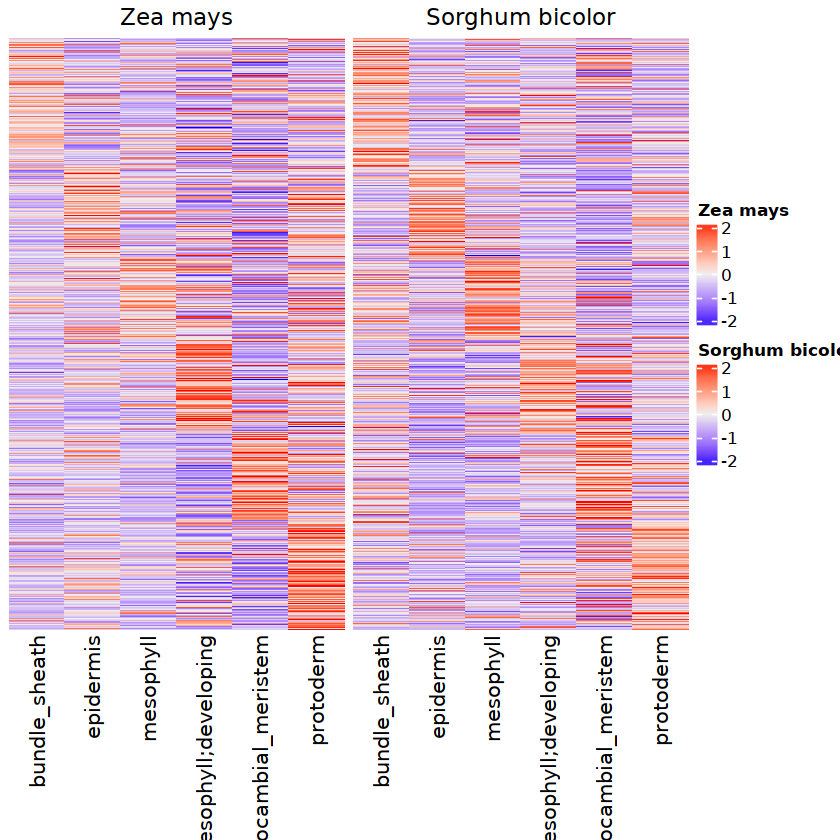

In [49]:
## INCORRECT ORDERING. BEWARE
zm_heatmap <- Heatmap(zm_heatmap_pre_matrix.filtered.order, name = "Zea mays", show_row_names = FALSE,
                      column_title = "Zea mays", cluster_rows = FALSE, cluster_columns = FALSE) 
sb_heatmap <- Heatmap(sb_heatmap_pre_matrix.filtered.order, name = "Sorghum bicolor", show_row_names = FALSE,
                      column_title = "Sorghum bicolor", cluster_rows = FALSE, cluster_columns = FALSE)

ht_list <- zm_heatmap + sb_heatmap 
draw(ht_list)

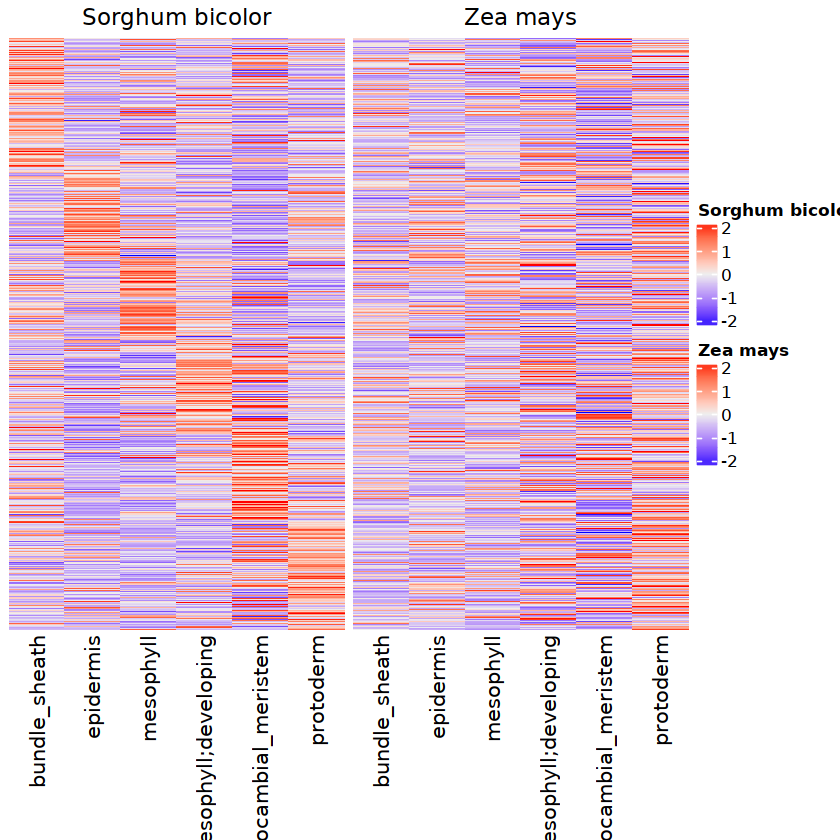

In [50]:
## Correct Ordering - Too Noisy

zm.row <- t(apply(zm_heatmap_pre_matrix.filtered, 1, rank))
sb.row <- t(apply(sb_heatmap_pre_matrix.filtered, 1, rank))
ave <- (zm.row + sb.row)/2
row.o <- apply(ave, 1, which.max)

sb_heatmap_pre_matrix.filtered.order <- sb_heatmap_pre_matrix.filtered[ order(row.o, decreasing=F), ]
zm_heatmap_pre_matrix.filtered.order <- zm_heatmap_pre_matrix.filtered[ (row.names(sb_heatmap_pre_matrix.filtered.order)), ]


zm_heatmap <- Heatmap(zm_heatmap_pre_matrix.filtered.order, name = "Zea mays", show_row_names = FALSE,
                      column_title = "Zea mays", cluster_rows = FALSE, cluster_columns = FALSE) 
sb_heatmap <- Heatmap(sb_heatmap_pre_matrix.filtered.order, name = "Sorghum bicolor", show_row_names = FALSE,
                      column_title = "Sorghum bicolor", cluster_rows = FALSE, cluster_columns = FALSE)

ht_list <- sb_heatmap + zm_heatmap
draw(ht_list)


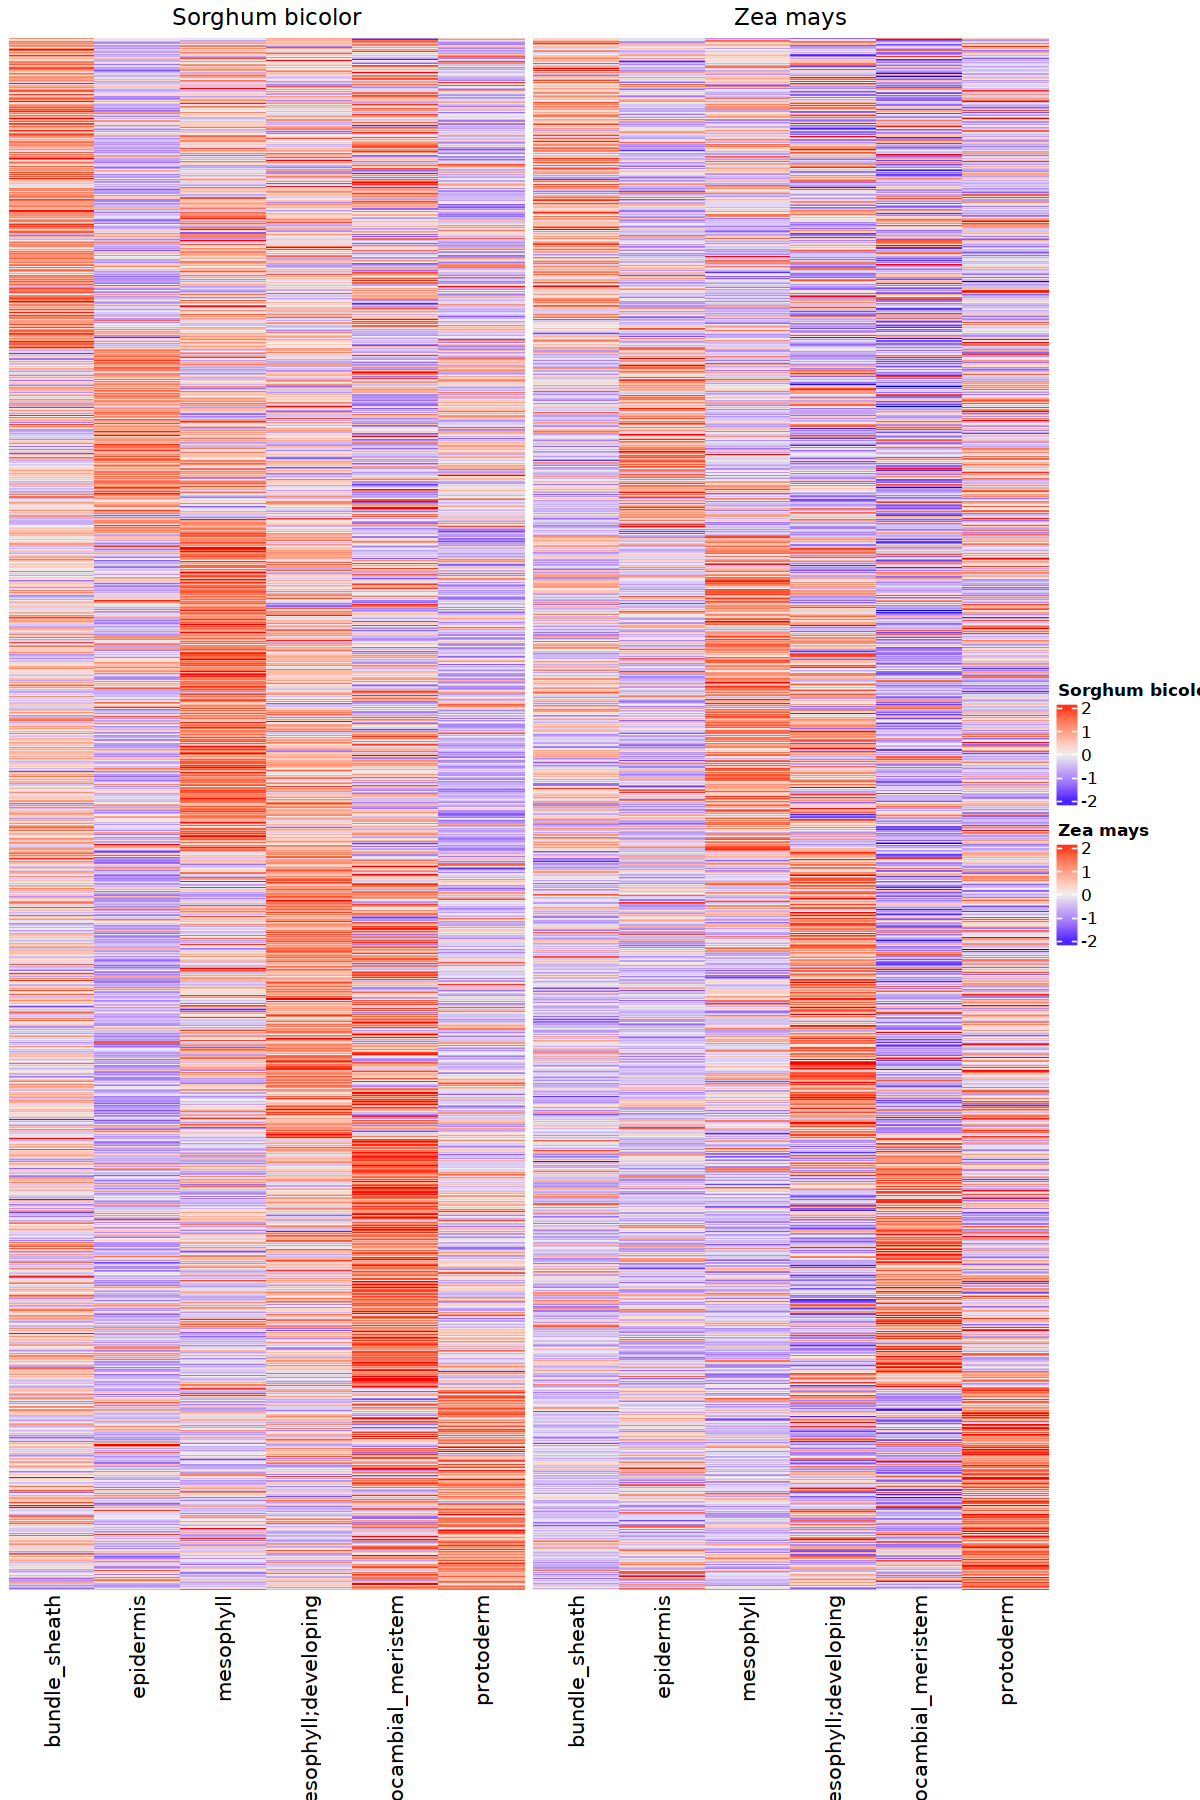

In [61]:
options(repr.plot.width=10, repr.plot.height=15)

sb_filtered_posotive <- sb_heatmap_pre_matrix.filtered[rowSums(sb_heatmap_pre_matrix.filtered) > 1,]
zm_filtered_by_sb_posotive <- zm_heatmap_pre_matrix.filtered[rownames(sb_filtered_posotive),]


class(sb_filtered_posotive) <- "numeric"
class(zm_filtered_by_sb_posotive) <- "numeric"



zm.row <- t(apply(zm_filtered_by_sb_posotive, 1, rank))
sb.row <- t(apply(sb_filtered_posotive, 1, rank))
ave <- (zm.row + sb.row)/2
row.o <- apply(ave, 1, which.max)
zm_heatmap_pre_matrix.filtered.order <- zm_filtered_by_sb_posotive[ order(row.o, decreasing=F), ]
sb_heatmap_pre_matrix.filtered.order <- sb_filtered_posotive[ row.names(zm_heatmap_pre_matrix.filtered.order),  ]


zm_heatmap <- Heatmap(zm_heatmap_pre_matrix.filtered.order, name = "Zea mays", show_row_names = FALSE,
                      column_title = "Zea mays", cluster_rows = FALSE, cluster_columns = FALSE) 
sb_heatmap <- Heatmap(sb_heatmap_pre_matrix.filtered.order, name = "Sorghum bicolor", show_row_names = FALSE,
                      column_title = "Sorghum bicolor", cluster_rows = FALSE, cluster_columns = FALSE)

ht_list <- sb_heatmap + zm_heatmap
draw(ht_list)


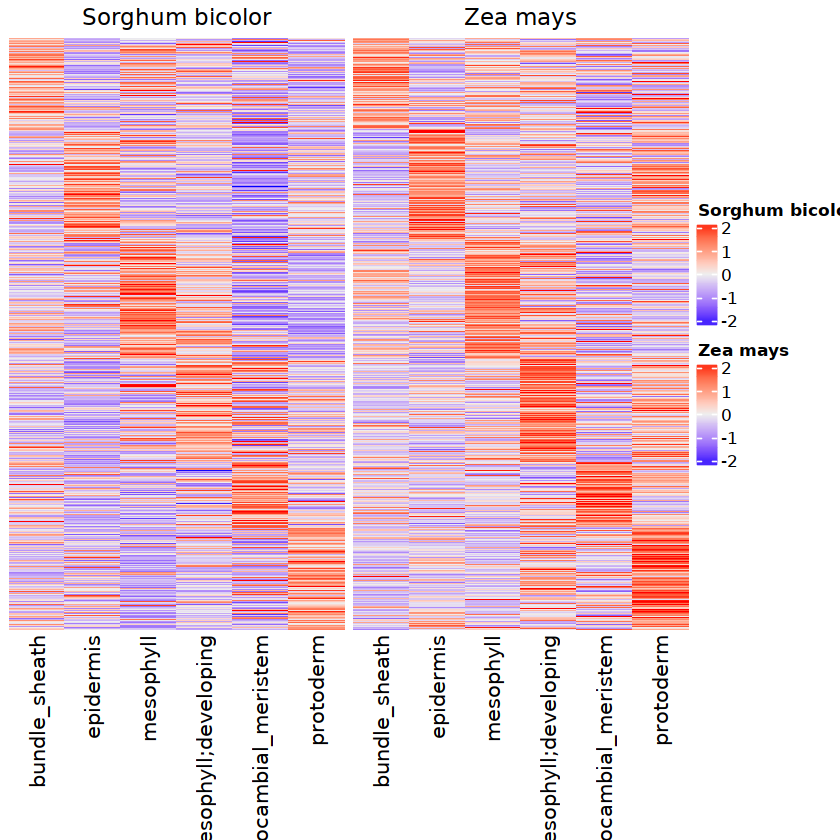

In [52]:
zm_filtered_by_sb_posotive <- zm_heatmap_pre_matrix.filtered[rowSums(zm_heatmap_pre_matrix.filtered) > 1,]
sb_filtered_posotive <- sb_heatmap_pre_matrix.filtered[row.names(zm_filtered_by_sb_posotive), ]


class(sb_filtered_posotive) <- "numeric"
class(zm_filtered_by_sb_posotive) <- "numeric"



zm.row <- t(apply(zm_filtered_by_sb_posotive, 1, rank))
sb.row <- t(apply(sb_filtered_posotive, 1, rank))
ave <- (zm.row + sb.row)/2
row.o <- apply(ave, 1, which.max)
zm_heatmap_pre_matrix.filtered.order <- zm_filtered_by_sb_posotive[ order(row.o, decreasing=F), ]
sb_heatmap_pre_matrix.filtered.order <- sb_filtered_posotive[ row.names(zm_heatmap_pre_matrix.filtered.order),  ]


zm_heatmap <- Heatmap(zm_heatmap_pre_matrix.filtered.order, name = "Zea mays", show_row_names = FALSE,
                      column_title = "Zea mays", cluster_rows = FALSE, cluster_columns = FALSE) 
sb_heatmap <- Heatmap(sb_heatmap_pre_matrix.filtered.order, name = "Sorghum bicolor", show_row_names = FALSE,
                      column_title = "Sorghum bicolor", cluster_rows = FALSE, cluster_columns = FALSE)

ht_list <- sb_heatmap + zm_heatmap
draw(ht_list)


In [53]:
sum(rowSums(zm_heatmap_pre_matrix.filtered) > 2 & rowSums(sb_heatmap_pre_matrix.filtered < -2))

[1] 1

Warning message in abs(rowSums(zm_heatmap_pre_matrix.filtered)) > 2 | abs(rowSums(sb_filtered_posotive)) > :
“longer object length is not a multiple of shorter object length”


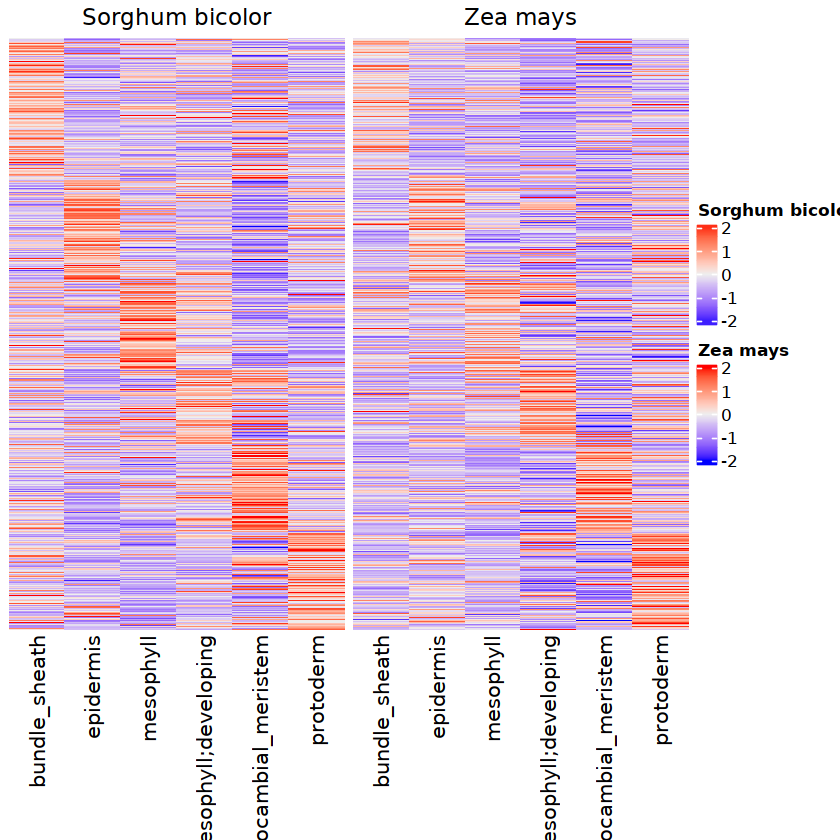

In [54]:
zm_filtered_by_sb_posotive <- zm_heatmap_pre_matrix.filtered[abs(rowSums(zm_heatmap_pre_matrix.filtered)) > 2 | abs(rowSums(sb_filtered_posotive)) > 2,]
sb_filtered_posotive <- sb_heatmap_pre_matrix.filtered[row.names(zm_filtered_by_sb_posotive), ]


class(sb_filtered_posotive) <- "numeric"
class(zm_filtered_by_sb_posotive) <- "numeric"



zm.row <- t(apply(zm_filtered_by_sb_posotive, 1, rank))
sb.row <- t(apply(sb_filtered_posotive, 1, rank))
ave <- (zm.row + sb.row)/2
row.o <- apply(ave, 1, which.max)
zm_heatmap_pre_matrix.filtered.order <- zm_filtered_by_sb_posotive[ order(row.o, decreasing=F), ]
sb_heatmap_pre_matrix.filtered.order <- sb_filtered_posotive[ row.names(zm_heatmap_pre_matrix.filtered.order),  ]


zm_heatmap <- Heatmap(zm_heatmap_pre_matrix.filtered.order, name = "Zea mays", show_row_names = FALSE,
                      column_title = "Zea mays", cluster_rows = FALSE, cluster_columns = FALSE) 
sb_heatmap <- Heatmap(sb_heatmap_pre_matrix.filtered.order, name = "Sorghum bicolor", show_row_names = FALSE,
                      column_title = "Sorghum bicolor", cluster_rows = FALSE, cluster_columns = FALSE)

ht_list <- sb_heatmap + zm_heatmap
draw(ht_list)


In [55]:
# Step 1: Call the pdf command to start the plot
pdf(file = "/home/jpm73279/EvoChromo_poster/ortholog_heatmap.annot_dotplot.pdf",
    width = 10, # The width of the plot in inches
    height = 15) # The height of the plot in inches

draw(ht_list)

dev.off()

png 
  2

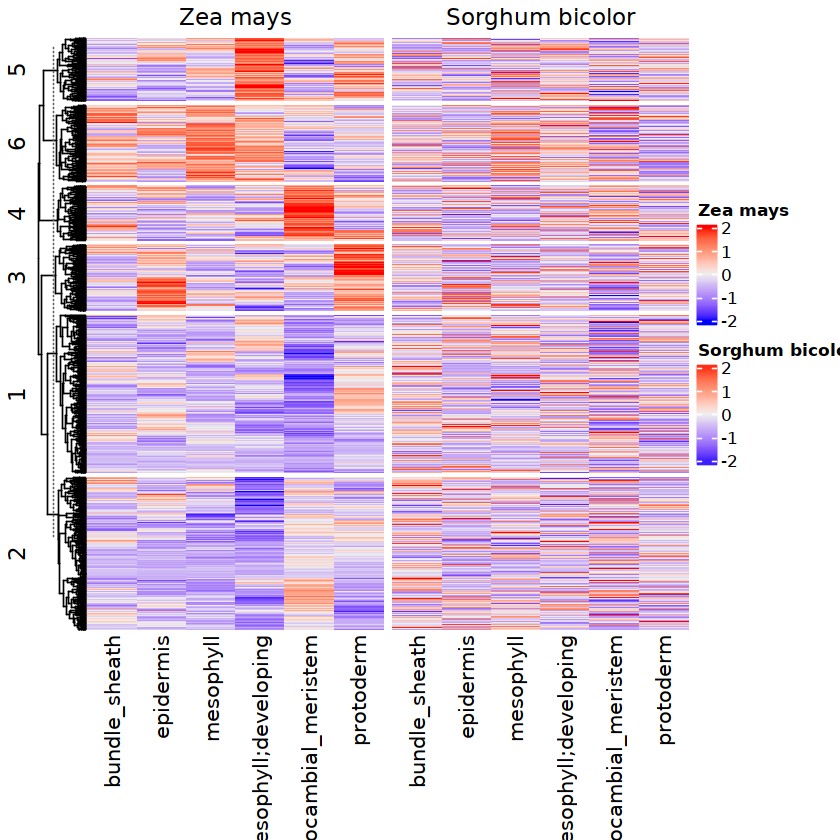

In [58]:

zm_heatmap <- Heatmap(zm_heatmap_pre_matrix.filtered.order, name = "Zea mays", show_row_names = FALSE,
                      column_title = "Zea mays", row_km = 6, row_km_repeats = 100,, cluster_columns = FALSE) 
sb_heatmap <- Heatmap(sb_heatmap_pre_matrix.filtered.order, name = "Sorghum bicolor", show_row_names = FALSE,
                      column_title = "Sorghum bicolor", cluster_rows = FALSE, cluster_columns = FALSE)

ht_list <- zm_heatmap + sb_heatmap
draw(ht_list)


In [57]:
zm_bed_genes <- "Zm-B73-REFERENCE-NAM_Zm00001eb.1.genes.bed"
sb_bed_genes <- "Sbicolorv5.1.gene.bed"


zm_genes <- read_delim(here(working_location, zm_bed_genes), 
                                           col_names = c("chrom", "start", "stop", "zm_gene"),
                                           delim = '\t')  %>% 
            select(chrom, start, stop, zm_gene)  %>% 
            mutate(zm_searchable_jbrowse_step_1 = str_c(chrom, start, sep = c(":")))  %>% 
            mutate(zm_searchable_jbrowse_step = str_c(zm_searchable_jbrowse_step_1, stop, sep = c("..")))  %>% 
            select(zm_gene, zm_searchable_jbrowse_step)

            


sb_genes <- read_delim(here(working_location, sb_bed_genes), 
                                           col_names = c("chrom", "start", "stop", "sb_gene"),
                                           delim = '\t')  %>% 
            select(chrom, start, stop, sb_gene)  %>% 
            mutate(sb_searchable_jbrowse_step_1 = str_c(chrom, start, sep = c(":")))  %>% 
            mutate(sb_searchable_jbrowse_step = str_c(sb_searchable_jbrowse_step_1, stop, sep = c("..")))  %>% 
            select(sb_gene, sb_searchable_jbrowse_step)

sb_meso_only <- sb_heatmap_pre_matrix.filtered.order[,("bundle_sheath")]
zm_meso_only <- zm_heatmap_pre_matrix.filtered.order[,("bundle_sheath")]

top_10_abs_difference_meso <- head(sort((sb_meso_only-zm_meso_only)),300)
top_10_abs_difference_all <- tail(sort(rowSums(abs(sb_heatmap_pre_matrix.filtered.order-zm_heatmap_pre_matrix.filtered.order))), 500)

all_zm_vs_sb_orthologue  %>% 
    left_join(., zm_genes, by = "zm_gene")  %>% 
    left_join(., sb_genes, by = "sb_gene")  %>% 
    filter(ortho_groups %in% names(top_10_abs_difference_meso)) 



ERROR: Error: '/scratch/jpm73279/comparative_single_cell/09.ortholog_heatmap/00.data/Zm-B73-REFERENCE-NAM_Zm00001eb.1.genes.bed' does not exist.


In [ ]:
top_10_abs_difference_all

In [ ]:
tail(sort(rowSums(abs(sb_heatmap_pre_matrix.filtered.order-zm_heatmap_pre_matrix.filtered.order))), 10)

In [ ]:
library(seriation)
o = seriate(max(zm_heatmap_pre_matrix.filtered.order) - zm_heatmap_pre_matrix.filtered.order, method = "BEA_TSP")

test_zm <- Heatmap(max(zm_heatmap_pre_matrix.filtered.order) - zm_heatmap_pre_matrix.filtered.order, name = "mat", 
    row_order = get_order(o, 1), cluster_columns = FALSE,
    column_title = "Zm")

o_sb = seriate(max(sb_heatmap_pre_matrix.filtered.order) - sb_heatmap_pre_matrix.filtered.order, method = "BEA")
test_sb <- Heatmap(max(sb_heatmap_pre_matrix.filtered.order) - sb_heatmap_pre_matrix.filtered.order, name = "mat", 
    row_order = get_order(o_sb, 1), cluster_columns = FALSE,
    column_title = "Sb")

draw(test_sb + test_zm)